## Modülleri import edelim..

In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 

%matplotlib inline
warnings.filterwarnings('ignore')

In [17]:
# Veri setini oluşturalım ve veri seti üzerinde değişiklik yapabileceğimizden ötürü bir kopyasını oluşturalım.

data = pd.read_csv('winequality.csv')
df = data.copy()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
# Verinin istatistiksel incelemesini yapalım.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [19]:
# Verinin Dtype incelemesini yapalım.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [20]:
# Veride 'null' değerlerin toplamını inceleyelim.

df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [28]:
# Şimdi veri setindeki missing value'ları bulalım.

for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())
        
#for döngüsünü açıklayacak olursak; df itemleri içerisinden col, value değerlerini ele alıyoruz ama col 'type' a eşit olmayan kısımları değerlendireceğiz, çünkü
#type object kısmından oluşuyor ve mean değerleri ile dolduramayız. Bir sonraki adımda verinin döngüdeki ilk kolonunu ele alıyor ve Na değerini buluyor ve o değere 
#kolon altındaki mean değerini koyuyor ve döngü bir sonraki kolon için aynen işliyor.
        
# tekrardan bakacak olursak

df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Keşifçi Veri Analizi

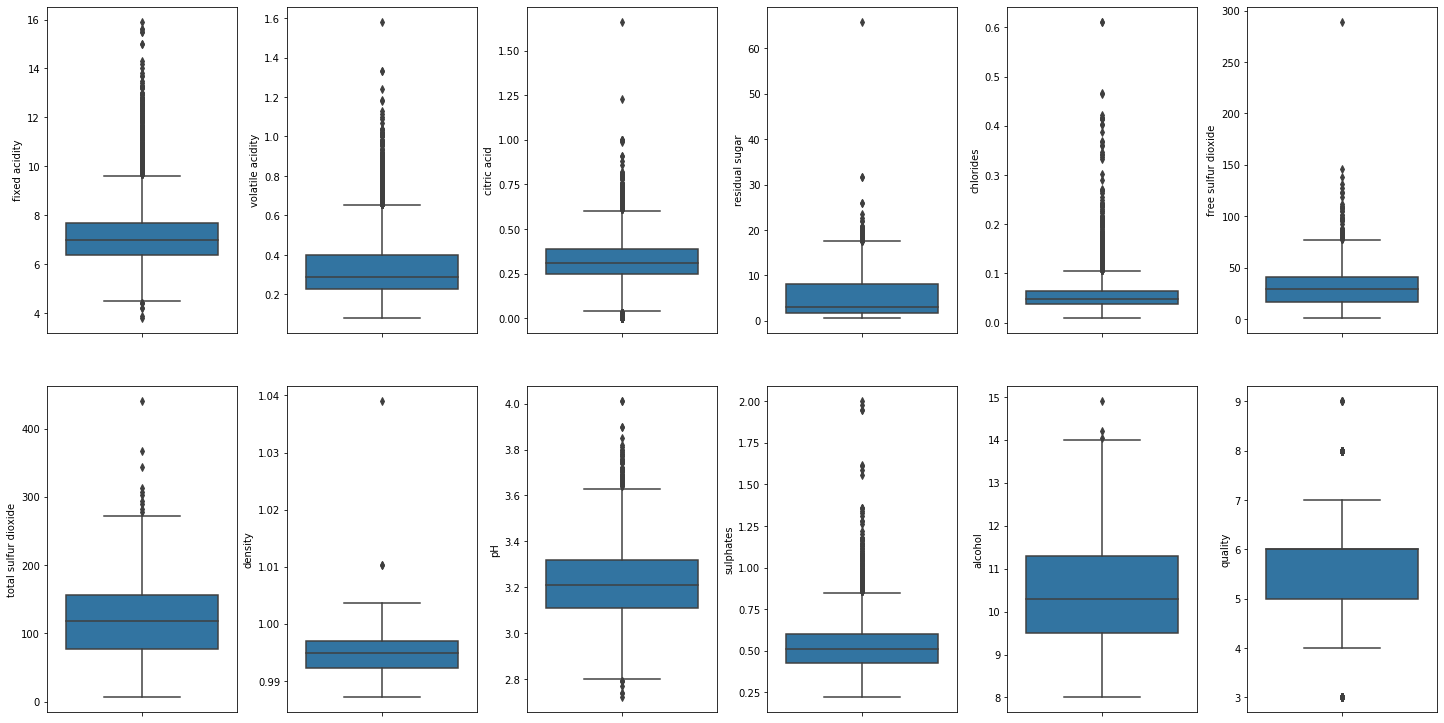

In [29]:
# aykırı değerler için boxplot oluşturalım

fig, ax = plt.subplots(ncols=6 , nrows= 2, figsize= (20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y= col, data= df, ax= ax[index])
        index += 1
        
plt.tight_layout(pad= 0.5, w_pad = 0.7, h_pad = 5.0)

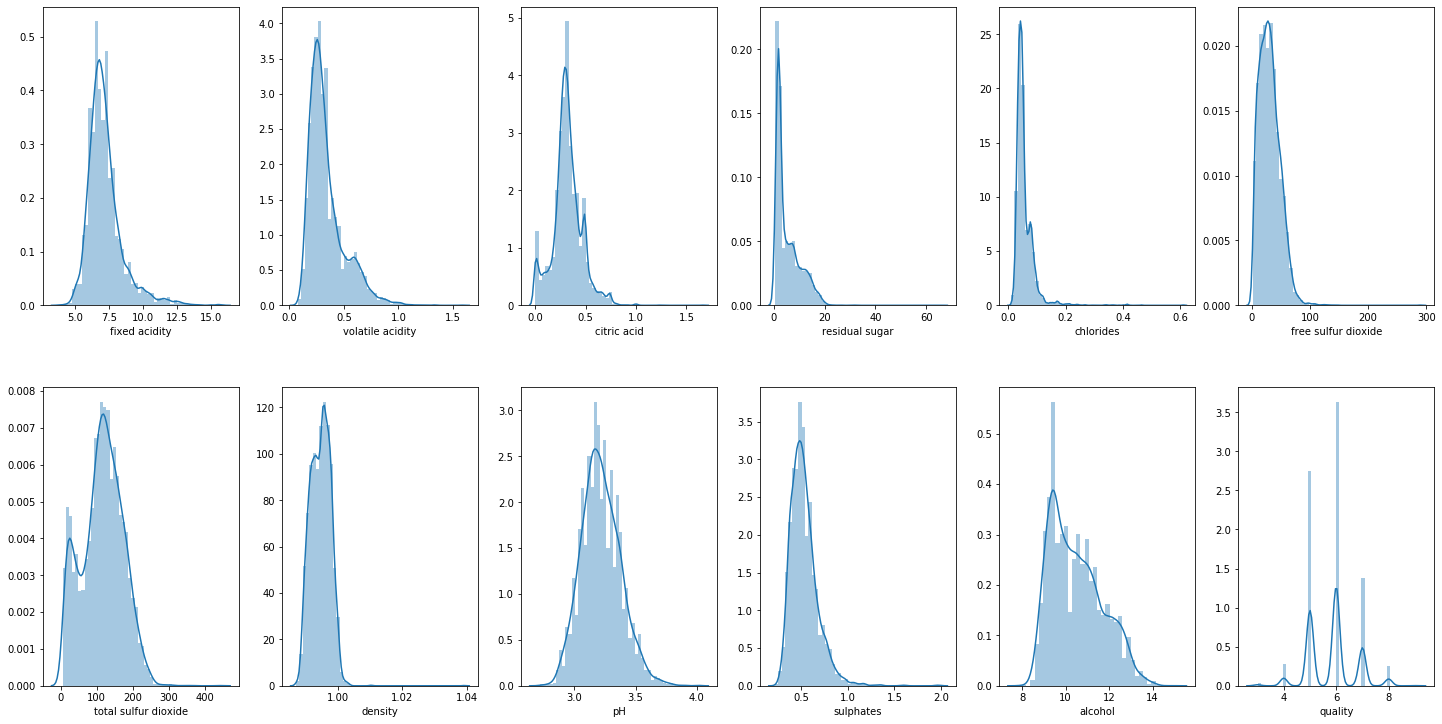

In [31]:
# distplot oluşturalım

fig, ax = plt.subplots(ncols=6 , nrows= 2, figsize= (20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax= ax[index])
        index += 1
        
plt.tight_layout(pad= 0.5, w_pad = 0.7, h_pad = 5.0)

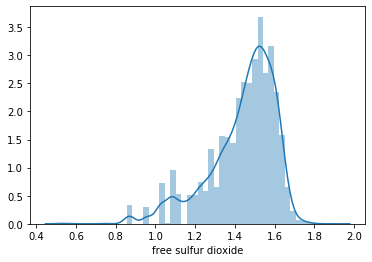

In [33]:
# log transformation --> ilgileneceğimiz colonun grafiğindeki çarpıklıgı azaltmak için kullanabileceğimiz çeşitli yöntemlerden biridir. Tam adı Logaritmik dönüşüm.

df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

sns.distplot(df['free sulfur dioxide']);

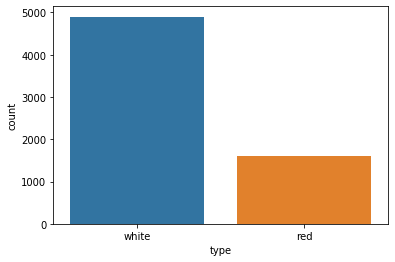

In [36]:
# kategorik değişkenler için countplot oluşturalım.

sns.countplot(df['type']);

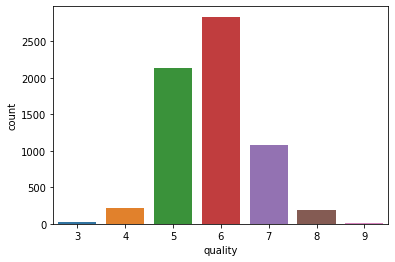

In [37]:
sns.countplot(df['quality']);

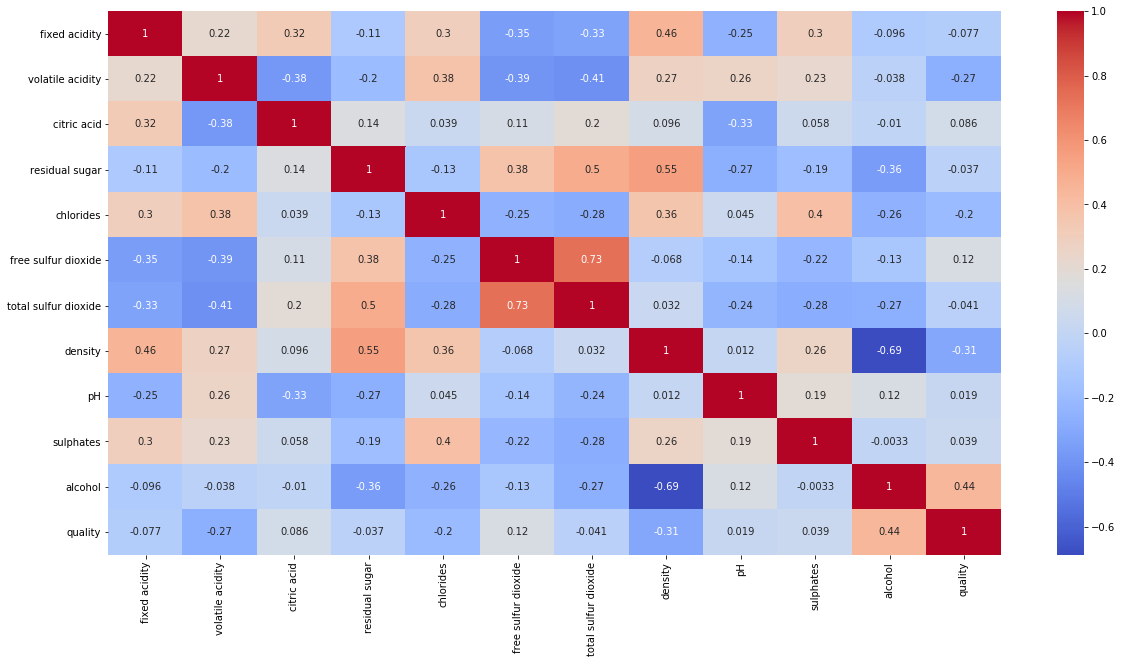

In [40]:
# veri setinin kendi içerindeki ilişkilerini incelemek için korelasyon matrisi oluşturalım.

corr = df.corr()
plt.figure(figsize= (20,10))
sns.heatmap(corr, annot= True, cmap= 'coolwarm');

In [42]:
# Şimdi x, y değişkenlerini oluşturalım.

X = df.drop(columns = ['type', 'quality'])
y = df['quality']

In [43]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,1.574565,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,1.310506,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,1.489299,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,1.583341,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,1.583341,186.0,0.9956,3.19,0.40,9.9


In [44]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

## Class Imbalancement

In [46]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=4)

#transform 
X, y = oversample.fit_resample(X, y)

# Bu işlemi class'lar arası dengesizliği engellemek için yapıyoruz.

In [57]:
y.value_counts()

9    2836
8    2836
7    2836
6    2836
5    2836
4    2836
3    2836
Name: quality, dtype: int64

## Model Training

In [58]:
from sklearn.model_selection import cross_val_score, train_test_split

def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)
    # train model 
    model.fit(X_train, y_train)
    print('Accuracy = ', model.score(X_test, y_test) * 100)
    
    # cross valudation 
    score = cross_val_score(model, X, y, cv= 5)
    print('CV Score = ', np.mean(score) * 100)
    
#Buradaki fonksiyonun açıklamasını yapacak olursak; classify adında bir fonksiyon tanımladın ve 3 tane argüman verdik. Bu argümanları dışarıdan tanımlayıp
#fonksiyonun içinde çeşitli işlemlerden geçireceğiz. İlk olarak X, y değerlerini train-test olarak ayırdık.
#daha sonra modelimi train setler üzerinden fit ettik ve modelimizi eğittik. Daha sonra Accuracy değerlerini test seti üzerinden elde ettik.
#cv score için ayrı modül kullandık ve argümanları model x ve y değerleri oldu cv değerini 5 olarak belirledik.
#CV score değerimizide score'un ortalamasını alarak belirlemiş olduk.

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, y)

Accuracy =  32.86318758815233
CV Score =  30.12269558835563


In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy =  81.60386862784607
CV Score =  77.64468086321041


In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model, X, y)

Accuracy =  89.09933507958895
CV Score =  83.61882337120446


In [62]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy =  90.38887769494256
CV Score =  84.83276677828616


In [63]:
import xgboost as xgb 

model = xgb.XGBClassifier()
classify(model, X, y)

Accuracy =  87.64859963731614
CV Score =  82.46043386339373


## Özet geçecek olursak...
###### -İlk olarak modülleri import ettik daha sonra veri setini oluşturduk ve üzerinde çalışmak üzere bir kopyasını oluşturduk.
###### -Daha sonra verinin değişkenlerini tiplerini, veri üzerindeki dağılımlarını, missing value, aykırı değerler gibi değerleri inceleyip sorunlar karşında çözümler bulduk.
###### -Class imbalancement için veriyi transform ettik.
###### -Fonksiyon oluşturarak modelimizi train ettik ve acc, cv score gibi değerlere erişimimizi sağladık.
###### -En son olarak çeşitli classifer yöntemlerini denedik ve bizim için en uygun yöntemi çıkan acc, cv score değerlerine göre karar verdik.